# Exploratory data analysis of the Adult data set

The Adult dataset used here can be download from the UCI machine learning repository: 
http://archive.ics.uci.edu/ml/datasets/Adult

The dataset has two classes (income >=50K, and income >50K) with 14 features:
- 6 quantitative (=numerical) variables,  i.e., age, fnlwgt, eduction-num, capital-gain, capital-loss, hours-per-week
- 8 qualitative (=categorical) variables, i.e., workclass, education, marital-status, occupation, relationship, race, sex and native-country.

## Load the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
                                names = ['age', 'workclass', 'fnlwgt','education',
                                        'education-num','marital-status','occupation',
                                        'relationship','race','sex','capital-gain',
                                        'capital-loss','hours-per-week','native-country',
                                        'income'])

dftest = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', 
                                names = ['age', 'workclass', 'fnlwgt','education',
                                        'education-num','marital-status','occupation',
                                        'relationship','race','sex','capital-gain',
                                        'capital-loss','hours-per-week','native-country', 'income'], 
                                skiprows = 1)


#### Sneak preview on dataframe:

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Which data types are we dealing with?

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

#### Do we have missing inputs (= empty fields)?

In [5]:
df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

In [6]:
dftest.count()

age               16281
workclass         16281
fnlwgt            16281
education         16281
education-num     16281
marital-status    16281
occupation        16281
relationship      16281
race              16281
sex               16281
capital-gain      16281
capital-loss      16281
hours-per-week    16281
native-country    16281
income            16281
dtype: int64

=> No, we don't have missing entries.

#### Are the same feature variables present in both the train and test dataset?

In [7]:
for column in ['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex','native-country']:
    print column
    print sorted(df[column].unique())
    print sorted(dftest[column].unique())
    print sorted(df[column].unique()) == sorted(dftest[column].unique())
    print ''

workclass
[' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']
[' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']
True

education
[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']
[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']
True

marital-status
[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']
[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married', ' Separated', ' Widowed']
True

occupation
[' ?', ' A

Except for the 'native-country', the categorical features are the same for both train and test set. In the 'native-country' category, the train set has one more country, the ' Holand-Netherlands', which is not present in the test set. 

#### Are we dealing with balanced classes?

In [8]:
a = df['income'][df['income'] == ' >50K'].count()
b = df['income'][df['income'] == ' <=50K'].count()
ratio = float(b)/float(a)
print 'Making more than 50K: ' + str(a)
print 'Making less or equal 50K: ' + str(b)
print 'Ratio: ' + str(ratio)

Making more than 50K: 7841
Making less or equal 50K: 24720
Ratio: 3.1526590996


The dataset are slightly imbalanced, and we should keep that in mind when visually exploring the data. 

## Explore features: categorical variables

First, let's define some functions to help visualize the categorical data:

In [9]:
def plotData(column, figsize=(7,5)):
    #input: string column = feature name
    a = df[column][df['income'] == ' >50K'].value_counts()
    b = df[column][df['income'] == ' <=50K'].value_counts()
    #Normalize counts by ratio
    a = a * ratio
    #add to new dataframe
    new = pd.concat([a,b], axis = 1, keys=[' >50K', ' <=50K'])
    
    new.plot(kind='barh', stacked= True, color = ['b', 'y'], figsize = figsize)

    
def printRatios(column, roundingprecision = 2):
    #prints ratios after normalization
    #input: string column = feature name
    a = df[column][df['income'] == ' >50K'].value_counts()
    b = df[column][df['income'] == ' <=50K'].value_counts()
    
    #Normalize by ratio
    a = a * ratio
    
    #print 'income >50K (normalized):'
    #print a
    #print '' 
    #print 'income <=50K:'
    #print b
    #print ''
    
    new = pd.concat([a,b], axis = 1, keys=[' >50K', ' <=50K'])
    print 'Normalized ratio of >50K to  <=50K  workers for feature ' + column + ':'
    for index in new.index:
        asum = float(new[' >50K'][index])
        bsum = float(new[' <=50K'][index])
        if math.isnan(asum) == True:
            asum = 0
        cratio = round(asum/bsum, roundingprecision)
        print (index + ': ').ljust(25) + str(cratio)

#### Workclass

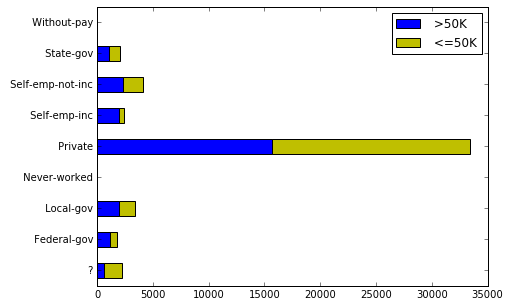

In [10]:
plotData('workclass')

In [11]:
printRatios('workclass') 

Normalized ratio of >50K to  <=50K  workers for feature workclass:
 ?:                      0.37
 Federal-gov:            1.99
 Local-gov:              1.32
 Never-worked:           0.0
 Private:                0.88
 Self-emp-inc:           3.97
 Self-emp-not-inc:       1.26
 State-gov:              1.18
 Without-pay:            0.0


Based on those ratios, we can conclude that the probability of having a job that pays more than 50K is highest for 'Self-emp-inc', and is quite high for 'Federal-gov' employees. Obviously, the chances of having a high salary is lowest for 'never-worked' and 'without-pay' groups.


#### Education

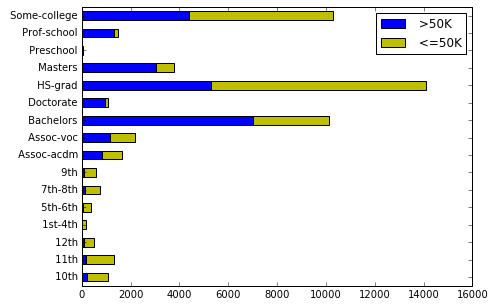

In [12]:
plotData('education')

In [13]:
printRatios('education') 

Normalized ratio of >50K to  <=50K  workers for feature education:
 10th:                   0.22
 11th:                   0.17
 12th:                   0.26
 1st-4th:                0.12
 5th-6th:                0.16
 7th-8th:                0.21
 9th:                    0.17
 Assoc-acdm:             1.04
 Assoc-voc:              1.11
 Bachelors:              2.23
 Doctorate:              9.02
 HS-grad:                0.6
 Masters:                3.96
 Preschool:              0.0
 Prof-school:            8.72
 Some-college:           0.74


Here, the results are not very surprising:

- 'Doctorate' and 'Prof-school' have highest ratios of earning > 50K, i.e., ca 9.0
- 'Master' have a ratio of ca 4.0
- 'Bachelors' have a ratio of ca 2.2
- 'Assoc-acdm' and 'Assoc-voc' have a ratio of ca 1.0
- 'Some-college' and 'HS-grad' have a ratio of 0.7 and 0.6
- Everybody who does not have a college degree has a ratio below 0.3 


#### Marital status

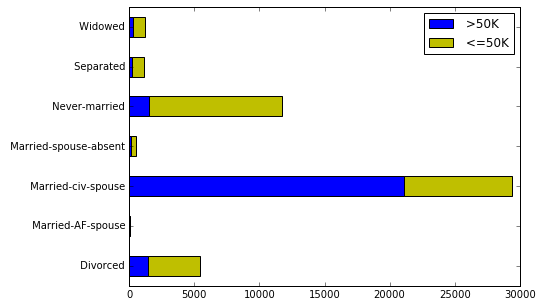

In [14]:
plotData('marital-status')

In [15]:
printRatios('marital-status') 

Normalized ratio of >50K to  <=50K  workers for feature marital-status:
 Divorced:               0.37
 Married-AF-spouse:      2.43
 Married-civ-spouse:     2.55
 Married-spouse-absent:  0.28
 Never-married:          0.15
 Separated:              0.22
 Widowed:                0.3


Here, we see a significant difference between people with a partner, and people without a partner, with people being in a relationship having a better income. 

#### Relationship

Relationship should be highly correlated with marital status:

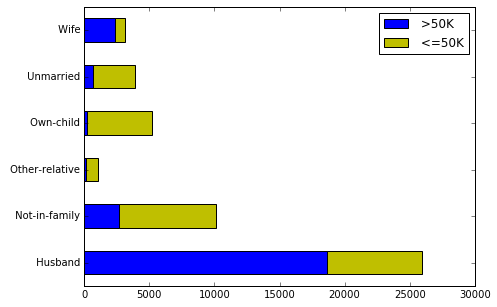

In [16]:
plotData('relationship')

In [17]:
printRatios('relationship') 

Normalized ratio of >50K to  <=50K  workers for feature relationship:
 Husband:                2.56
 Not-in-family:          0.36
 Other-relative:         0.12
 Own-child:              0.04
 Unmarried:              0.21
 Wife:                   2.85


As expected from the marital-status feature, wifes and husbands (=married people) have a higher earning potential.

#### Occupation

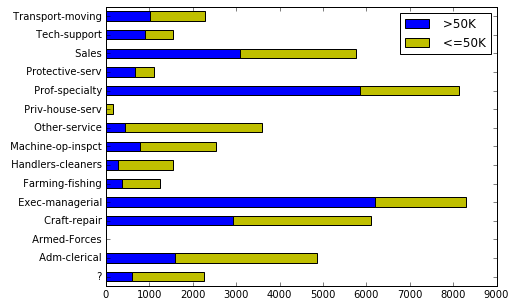

In [18]:
plotData('occupation')

In [19]:
printRatios('occupation')

Normalized ratio of >50K to  <=50K  workers for feature occupation:
 ?:                      0.36
 Adm-clerical:           0.49
 Armed-Forces:           0.39
 Craft-repair:           0.92
 Exec-managerial:        2.96
 Farming-fishing:        0.41
 Handlers-cleaners:      0.21
 Machine-op-inspct:      0.45
 Other-service:          0.14
 Priv-house-serv:        0.02
 Prof-specialty:         2.57
 Protective-serv:        1.52
 Sales:                  1.16
 Tech-support:           1.38
 Transport-moving:       0.79


The highest paying occupations are:
- Exec-managerial (2.96)
- Prof-specialty (2.57)
- Protective-serv (1.52)
- Tech-support (1.38)

This also somewhat correlates with the feature 'Education', since those professions often require a lot of training above the level of a college degree.

#### Race

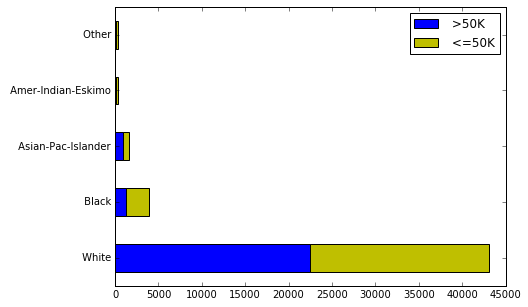

In [20]:
plotData('race')

In [21]:
printRatios('race')

Normalized ratio of >50K to  <=50K  workers for feature race:
 White:                  1.08
 Black:                  0.45
 Asian-Pac-Islander:     1.14
 Amer-Indian-Eskimo:     0.41
 Other:                  0.32


Being White or Asian-Pac-Islander helps to be on the higher income group, while there is an obvious income gap for black and native Americans. 

#### Sex

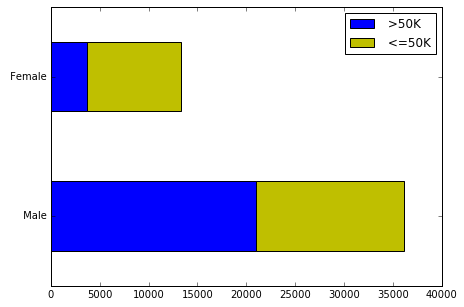

In [22]:
plotData('sex')

In [23]:
printRatios('sex')

Normalized ratio of >50K to  <=50K  workers for feature sex:
 Male:                   1.39
 Female:                 0.39


Pretty obviously, there is a big gender gap. 

#### Native country

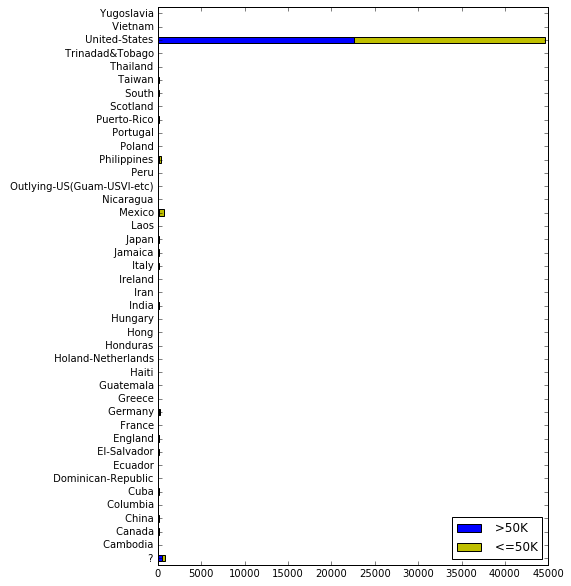

In [24]:
plotData('native-country', figsize=(7,10))

Most of the people in the survey are US people!

In [25]:
printRatios('native-country')

Normalized ratio of >50K to  <=50K  workers for feature native-country:
 ?:                      1.05
 Cambodia:               1.84
 Canada:                 1.5
 China:                  1.15
 Columbia:               0.11
 Cuba:                   1.13
 Dominican-Republic:     0.09
 Ecuador:                0.53
 El-Salvador:            0.29
 England:                1.58
 France:                 2.23
 Germany:                1.49
 Greece:                 1.2
 Guatemala:              0.16
 Haiti:                  0.32
 Holand-Netherlands:     0.0
 Honduras:               0.26
 Hong:                   1.35
 Hungary:                0.95
 India:                  2.1
 Iran:                   2.27
 Ireland:                0.83
 Italy:                  1.64
 Jamaica:                0.44
 Japan:                  1.99
 Laos:                   0.39
 Mexico:                 0.17
 Nicaragua:              0.2
 Outlying-US(Guam-USVI-etc): 0.0
 Peru:                   0.22
 Philippines:            1.4
 

There are a lot of foreign countries, and many of them have small total numbers, and thus, it is hard to draw statistically meaningful conclusion here. However, as a general trend, one can see that Europeans and Asians have a higher earning potential, while South American and African immigrant have lower salaries. Most likely, the more developed immigrant countries have higher salaries. 

## Explore features: numerical variables

In [26]:
def plotHistogram(column, figsize = (7,5)):
 
    a = df[column][df['income'] == ' >50K']
    b = df[column][df['income'] == ' <=50K']
    #add to new dataframe
    new = pd.concat([a,b], axis = 1, keys=[' >50K', ' <=50K'])  
    new.plot(kind='hist', color = ['b', 'y'], bins = 80, figsize = figsize, alpha = 0.5)


#### Age

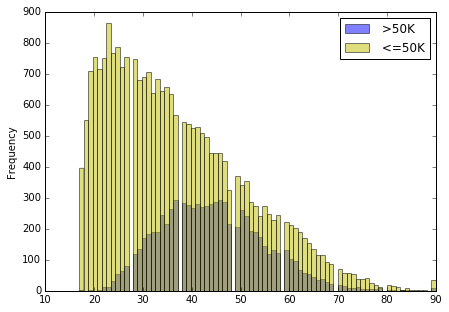

In [27]:
plotHistogram('age')

One's salaray is increasing with age.

#### fnlwgt

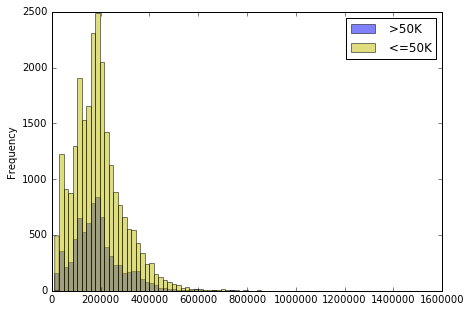

In [28]:
plotHistogram('fnlwgt')

Whatever this features corresponds to, it seems to be similary distributed for both groups. For classification, this is probably not a very predictive feature, and we might to drop this it later.

#### education-num

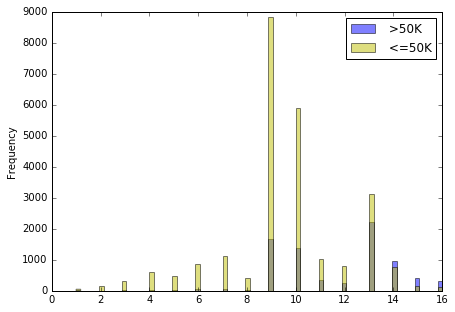

In [29]:
plotHistogram('education-num')

The numerical feature 'education-num' must be highly correlation to the categorical feature education. The higher the education num (years?), the higher the chances to earn a salary more than 50K.


#### capital-gain

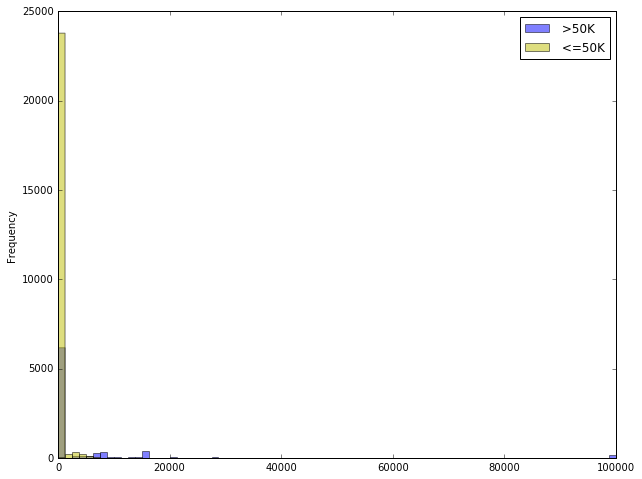

In [30]:
plotHistogram('capital-gain', figsize = (10,8))

Large captial gain seems occure a bit more often for the >50K income salary group, however, most of the datapoints are in the leftmost range. Thus, this might not be a very predictive feature.

#### capital-loss

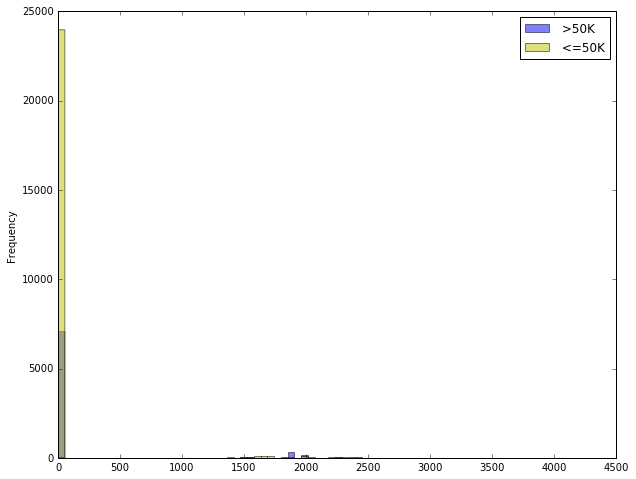

In [31]:
plotHistogram('capital-loss', figsize = (10,8))

Capital loss does not seem to be related too strongly on income, and again, most datapoints lie in the leftmost bin. Thus, capital losss might not be a very predictive feature either. 

#### hours-per-week

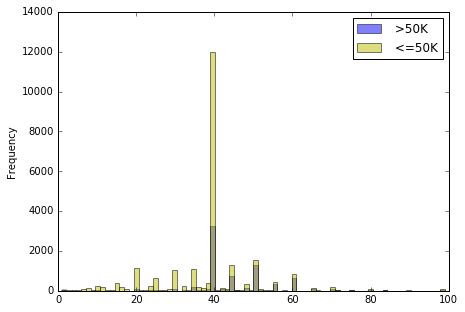

In [32]:
plotHistogram('hours-per-week')

Most people work 40 hour a week. 

However, given that there only ca. 25% of our dataset falls into the income group of >50K, the > 50K worker tend to work longer, while the <= 50K workers more often work less than 40 hours a week.